<a href="https://colab.research.google.com/github/MMoronto/pytorch_exercises/blob/master/Pytorch_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Fundamentals**

In [375]:
import torch
torch.__version__

'1.13.0+cu116'

Creating tensors

In [376]:
# Create a scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [377]:
scalar.ndim

0

In [378]:
# Get the Python number within a one-element tensor
scalar.item()

7

In [379]:
# Create a vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [380]:
#check the number of dimensions of vector
vector.ndim

1

In [381]:
# Check shape of vector
vector.shape

torch.Size([2])

In [382]:
# Matrix
matrix = torch.tensor([[7, 8],
                      [9, 10]])
matrix

tensor([[ 7,  8],
        [ 9, 10]])

In [383]:
matrix.ndim

2

In [384]:
matrix.shape

torch.Size([2, 2])

In [385]:
# Let's make a tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [386]:
# Check number of dimensions for TENSOR
TENSOR.ndim

3

In [387]:
TENSOR.shape

torch.Size([1, 3, 3])

In [388]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.6611, 0.0600, 0.5174, 0.1596],
         [0.7550, 0.8390, 0.0674, 0.4631],
         [0.1477, 0.3597, 0.9328, 0.0170]]), torch.float32)

In [389]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [390]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]), torch.float32)

In [391]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]), torch.float32)

In [392]:
# Use torch.arange(). 
# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [393]:
# Create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [394]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # Defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # Defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

In [395]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

In [396]:
# create a tensor and find out details about it
some_tensor = torch.rand(3, 4)

# Find out details about the tensor
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.5766, 0.2730, 0.0666, 0.8961],
        [0.4802, 0.1709, 0.1498, 0.8931],
        [0.8929, 0.7059, 0.3683, 0.9926]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [397]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.long)
int_32_tensor

tensor([3, 6, 9])

In [398]:
float_32_tensor * int_32_tensor

tensor([ 9., 36., 81.])

## **Tensor Ops**

In [399]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [400]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

In [401]:
# Tensors don't change unless they are reassigned
tensor

tensor([1, 2, 3])

In [402]:
# Subtract and reassign
tensor = tensor - 10
tensor 

tensor([-9, -8, -7])

In [403]:
# Add and reassign
tensor = tensor + 10
tensor

tensor([1, 2, 3])

In [404]:
# Use built-in pytorch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [405]:
# Original tensor is still unchanged
tensor

tensor([1, 2, 3])

In [406]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [407]:
# Element-wise multiplication and matrix multiplication
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape 

torch.Size([3])

In [408]:
# Element-wise and matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [409]:
# Matrix multiplicatiion
torch.matmul(tensor, tensor)


tensor(14)

In [410]:
# A not so recommended symbol for matrix multiplication
tensor @ tensor

tensor(14)

In [411]:
%%time
# Matrix multiplication by hand
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 213 µs, sys: 27 µs, total: 240 µs
Wall time: 249 µs


tensor(14)

In [412]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 65 µs, sys: 9 µs, total: 74 µs
Wall time: 77.5 µs


tensor(14)

In [413]:
# # inner dimensions need to match for matrix multiplication to work
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

# torch.matmul(tensor_A, tensor_B) # this won't work because the inner dimensions don't match

In [414]:
# When inner dimensions don't match, you can use the transpose function to enable the multiplication work
print(tensor_A)
print(tensor_B.T)

print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])
Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


In [415]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

In [416]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [417]:
# Find max, min, sum, etc. (aggregation)
print(f"Minumum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this gives us an error
print(f"Mean: {x.type(torch.float32).mean()}") # wont work w/o float datatype
print(f"Sum: {x.sum()}")

Minumum: 0
Maximum: 90
Mean: 45.0
Sum: 450


In [418]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

In [419]:
#Positional min/max

#create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Return index of max & min vals
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")



Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


In [420]:
# Change tensor datatype

#create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [421]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [422]:
# Create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

In [423]:
# RESHAPING, STACKING, SQUEEZING & UNSQUEEZING

#create a tensor
import torch

x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [424]:
# Let's add an extra dimension w/ torch.reshape()

#Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [425]:
# Let's change the view with torch.view()

#Change view (keeps same data as original but changes view)
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [426]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

In [427]:
# Stack tensors on top of each other five times
x_stacked = torch.stack([x, x, x, x], dim=0) # try changing dim to dim=1
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

In [428]:
# try changing dim to dim=1
x_stacked = torch.stack([x, x, x, x], dim=1) 
x_stacked

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.]])

In [429]:
#removing all single dimensions from a tensor

print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Rename extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


In [430]:
# adding a dimension value of 1 at a specific index
# torch.unsqueeze()

print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")


Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


In [431]:
# Create tensor w/ specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [432]:
# Indexing (selecting data from tensors)

#Create a tensor
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]), torch.Size([1, 3, 3]))

In [433]:
#How to index bracket by bracket
#indexing vals goes from outer dimension -> inner dimension

print(f"First square bracket: \n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


In [434]:
# Index the middle bracket
x[0, 0], x[0][0]

(tensor([1, 2, 3]), tensor([1, 2, 3]))

In [435]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [436]:
# Get all values of 0th & 1st dimension but only the index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [437]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [438]:
# Get index 0 of 0th and last dimension and all values of 2nd dimension
x[0, 0, :]

tensor([1, 2, 3])

**PYTORCH TENSORS & **NUMPY**

In [439]:
# Numpy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
# tensor = torch.from_numpy(array) .type(torch.float32)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

Because we reassigned `tensor` above, if you change the tensor, the array stays the same.

In [440]:
# Change the array, keep the tensor
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

If you want to go from PyTorch tensor to NumPy array, you can call `tensor.numpy()`

In [441]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [442]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [443]:
# Reproducability

import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.7560, 0.1070, 0.4576, 0.1334],
        [0.1328, 0.9503, 0.6952, 0.5453],
        [0.9905, 0.6430, 0.6432, 0.8946]])

Tensor B:
tensor([[0.0167, 0.2945, 0.8729, 0.2146],
        [0.7336, 0.3669, 0.2522, 0.1606],
        [0.0805, 0.6712, 0.5566, 0.0256]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [444]:
# To make random but reproducible tensors
import torch
# Set the random seed
RANDOM_SEED=45
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# HAve to reset the seed every time a new rand() is called
# W/O this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) 
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor_C equal Tensor_D?(anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.1869, 0.9613, 0.6834, 0.8988],
        [0.0505, 0.5555, 0.7861, 0.0566],
        [0.7842, 0.1480, 0.0388, 0.1037]])

Tensor D:
tensor([[0.1869, 0.9613, 0.6834, 0.8988],
        [0.0505, 0.5555, 0.7861, 0.0566],
        [0.7842, 0.1480, 0.0388, 0.1037]])

Does Tensor_C equal Tensor_D?(anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

To check if you've got access to a Nvidia GPU, you can run `!nvidia-smi`

In [445]:
#check if you've got access to a Nvidia GPU
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



Getting PyTorch to run on the GPU

In [446]:
# Check for GPU
import torch
torch.cuda.is_available()

False

In [447]:
# Create a device variable to store what kind of device is available.

#Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [448]:
# Count number of devices
torch.cuda.device_count()

0

**Putting tensors (and models) on the GPU**

You can put tensors on a specific device by calling to

*   List item
*   List item

(device) on them.

In [449]:
# creating a tensor and putting it on the GPU (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3])

**Moving tensors back to the CPU**

In [450]:
# If tensor is on GPU, can't transform it to NumPy (will give error)

# tensor_on_gpu.numpy()

Instead, to get a tensor back to CPU and usable with NumPy we can use `Tensor.cpu()`.



In [451]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

The above returns a copy of the GPU tensor in CPU memory so the original tensor is still on GPU.

In [452]:
tensor_on_gpu

tensor([1, 2, 3])

# **PyTorch Workflow Fundamentals**

In [453]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.13.0+cu116'

Data Prep & Loading

In [454]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Split data into training and test sets

Before we build a modelthat can learn the relationship between x (features) and y (labels), we need to split our data into a training and a test set(& when needed, a validation set).

In [455]:
# Create train/test split
train_split = int(0.8 * len(x)) # 80% of data used for training set, 20% for testing set
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

Create a function to visualize data

In [456]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  """
  plots training data, test data & compares predictions
  """
  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

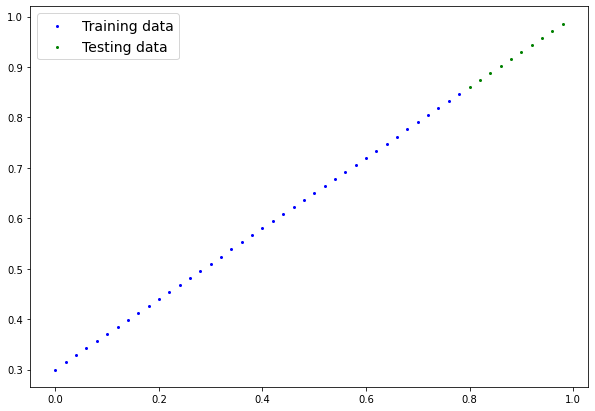

In [457]:
plot_predictions();

# Build Model

We'll build a model to use the blue dots to predict the green dots.

Let's start by replicating a standard linear regression model using pure PyTorch.

In [458]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?)

    self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch defaults to float32
                             requires_grad=True) # <- can we update this value with gradient descent?))

  # Forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
      return self.weights * x * self.bias # <- this is the linear regression formula (y = m*x + b)

create a model instance with the class we've made & check it's parameters using `.parameters()`

In [459]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model ( this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can get the state(i.e. the content of the model) of the model using `.stat_dict()`

In [460]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making Predictions using `torch.inference_mode()`

TO check this we can pass in the test data X_test to see how closely it predicts y_test.

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined.

In [461]:
# Make predictions with model
with torch.inference_mode():  # this is a context manager--we use it to make predictions(i.e. inference)
  y_preds = model_0(x_test)

In [462]:
# Check the predictions
print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.0347],
        [0.0356],
        [0.0364],
        [0.0373],
        [0.0382],
        [0.0390],
        [0.0399],
        [0.0408],
        [0.0416],
        [0.0425]])


 Let's visualize our predictions with the `plot_predictions()` function we created above.

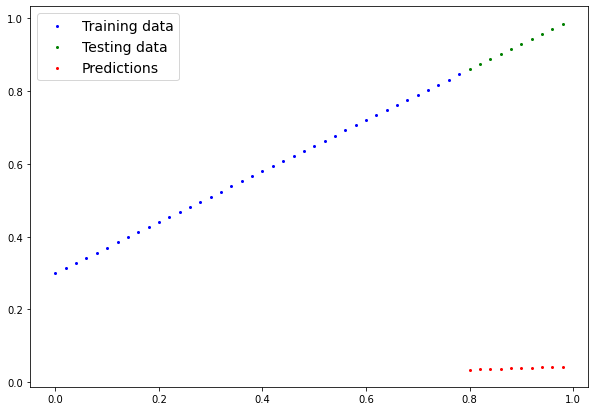

In [463]:
plot_predictions(predictions=y_preds)

In [464]:
y_test - y_preds

tensor([[0.8253],
        [0.8384],
        [0.8516],
        [0.8647],
        [0.8778],
        [0.8910],
        [0.9041],
        [0.9172],
        [0.9304],
        [0.9435]])

Our predictions look pretty bad since our model is just using random parameter values to make predictions. It needs to look at the blue dots to try to predict the green dots. We do this by training our model.

# 3. Train model

Right now our model is using random parameters to make calculations. It's guessing blindly.

To fix that we can update its internal params/patterns, the weights & bias values we set randomly using `nn.Parameter()` & `torch.randn()` to be something that better represents the data.

Most times we won't know what the ideal params are for a model, instead we write code to see if the model can try & figure them out itself.

## Creating a loss function and optimizer in PyTorch

For our model to update its params on its own, we'll need to add a **loss function** & an **optimizer** to it.


**Loss function**	Measures how wrong your models predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). The Lower the better.	

PyTorch has plenty of built-in loss functions in torch.nn.	

Some common loss function values are: Mean absolute error (MAE) for regression problems (`torch.nn.L1Loss()`). Binary cross entropy for binary classification problems (`torch.nn.BCELoss()`).

**Optimizer**	Tells your model how to update its internal parameters to best lower the loss.

You can find various optimization function implementations in `torch.optim`.

Some common optimizer values are: Stochastic gradient descent (torch.optim.SGD()). Adam optimizer (torch.optim.Adam()).

Lets create a loss function & an optimizer we can use to improve out model.

In [465]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

## Creating an optimization loop in PyTorch

The next step is to create a training and a testing loop for our model.

The training loop involves the model going through the training data and learning the relationships between the `features` and `labels`.

The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data(the model never sees the testing data during training).

We'll use a Python `for` loop to accomplish this step.

In [466]:
torch.manual_seed(46)

# Set the number of epochs (the number of times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(x_train)
    # print(y_pred)

    # 2. Calc the loss (how diff are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(x_test)

      # 2. Calc loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
          epoch_count.append(epoch)
          train_loss_values.append(loss.detach().numpy())
          test_loss_values.append(test_loss.detach().numpy())
          print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.5560861229896545 | MAE Test Loss: 0.8839500546455383 
Epoch: 10 | MAE Train Loss: 0.5540589094161987 | MAE Test Loss: 0.8792990446090698 
Epoch: 20 | MAE Train Loss: 0.5519170761108398 | MAE Test Loss: 0.8743834495544434 
Epoch: 30 | MAE Train Loss: 0.5496475696563721 | MAE Test Loss: 0.869173526763916 
Epoch: 40 | MAE Train Loss: 0.5472366213798523 | MAE Test Loss: 0.8636374473571777 
Epoch: 50 | MAE Train Loss: 0.5446696281433105 | MAE Test Loss: 0.8577418327331543 
Epoch: 60 | MAE Train Loss: 0.5419310331344604 | MAE Test Loss: 0.8514509201049805 
Epoch: 70 | MAE Train Loss: 0.5390040874481201 | MAE Test Loss: 0.8447263836860657 
Epoch: 80 | MAE Train Loss: 0.5358710885047913 | MAE Test Loss: 0.8375275731086731 
Epoch: 90 | MAE Train Loss: 0.5325131416320801 | MAE Test Loss: 0.829810619354248 


Notice how our loss is decreasing with each epoch. We can plot this to visualize it better.

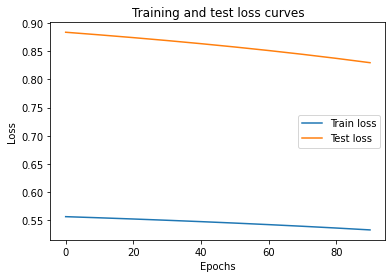

In [467]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

The **loss curves** show the loss diminishing over time. Remember, loss is a measure of how wrong the model is, so the lower the better.

In [468]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.4138])), ('bias', tensor([0.2732]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Our model got very close to calculate the exact original values for `weight` and `bias` (and it would probably get even closer if we trained it for longer).

## 4. Making predictions with a trained PyTorch model (inference)